## Task 1 ##

### Task 1.1 ###
Bayes rule states:

$$
\begin{align*}
p(\theta|y) &= \frac{p(y|\theta)p(\theta)}{p(y)} 
\propto p(y|\theta)p(\theta) \\
&= \binom{N}{y} \theta^y (1-\theta)^{N-y} \times \frac{1}{B(a_0, b_0)} \theta^{a_0-1} (1-\theta)^{b_0-1} \\
&= \theta^{y+a_0-1} (1-\theta)^{N-y+b_0-1} \\
&\propto \text{Beta}(\theta|y+a_0, N-y+b_0)
\end{align*}
$$
Given $N=17$, $y=1$, $a_0 = b_0 = 1$, we have:

$$
p(\mu|y = 1) = \text{Beta}(2,17)
$$


### Task 1.2 ###
The posterior mean is a compromise between the prior mean and the maximum likelihood solution:

$$
E[\theta|y] = \frac{a}{a + b} = \frac{a_0 + y}{a_0 + b_0 + N} = \frac{2}{2+17}\approx 0.10526
$$

A central interval has $(1-\alpha)/2$ mass in each tail. If the posterior has a known functional form, we can compute the posterior central interval using:

$$
l = F^{-1}(\alpha/2) \quad \text{and} \quad u = F^{-1}(1-\alpha/2)
$$

Thus, we have:

$$
P(0.01375 \leq \mu \leq 0.272944 | D) = 0.95
$$

In [1]:
## 1.2
import scipy.stats as stats

# Define the shape parameters (a and b) for the beta distribution
a = 2
b = 17

# Calculate the inverse CDF (quantile) for a specific probability (e.g., 0.95)
quantile = 0.95
alpha = 1-quantile

# Calculate low and upper bounds for the quantile
l = stats.beta.ppf(alpha/2, a, b)
u = stats.beta.ppf(1-alpha/2, a, b)

# Print the bounds  
print(f"Low: {l}")
print(f"Upper: {u}")

Low: 0.013751215664364498
Upper: 0.27294359967336845


### Task 1.3 ###
Now we have the previous posterior as the prior function
- Prior: $p(\theta) = \text{Beta}(\theta|a_0 ,b_0) = \text{Beta}(\theta|2 ,17)$

Binom dist with y=4 and N=20 as the likelihood function
- Likelihood: $p(y |\theta) = \binom{N}{y} \theta^y (1 -\theta)^{N-y} = \binom{20}{4} \theta^4 (1 -\theta)^{20-4}$

Therefore,
- Posterior: $p(\theta|y ) = \text{Beta}(\theta|a_0 + y ,b_0 + N - y) = {Beta}(\theta|6,33) $

And
- $E[\theta|y] = \frac{a}{a + b} = \frac{6}{39} \approx 0.153846$

The 95% interval is calculated and shown below in the python cell.

In [2]:
## 1.3
import scipy.stats as stats

# Define the shape parameters (a and b) for the beta distribution
a = 6
b = 33

# Calculate the inverse CDF (quantile) for a specific probability (e.g., 0.95)
quantile = 0.95
alpha = 1-quantile

# Calculate low and upper bounds for the quantile
l = stats.beta.ppf(alpha/2, a, b)
u = stats.beta.ppf(1-alpha/2, a, b)

# Print the bounds  
print(f"Low: {l}")
print(f"Upper: {u}")

Low: 0.06022972791738465
Upper: 0.2808638458837533


### Task 1.4 ###
 
The expression corresponds to a Betta distribution

If we exponentiate both sides to remove the logarithms, we get:

$$
p(\mu) = \mu^{95} (1-\mu)^{10} e^{\text{c}}
$$

If we compare it with the functional form of the Betta function
$$
p(\theta) = \theta^{a-1} (1-\theta)^{b-1}
$$

We can identify the terms `a = 96` and `b = 11`

And we compute the mean as:
$$
E[\mu] = \frac{a}{a + b} = \frac{96}{96 + 11} \approx 0.897
$$

## Task 2 ##

We have a variable x which is defined by a Bernoulli distribution:

$
\begin{equation}
    x = \begin{cases}
        0 \text{ with } p=1-\alpha\\
        1 \text{ with } p=\alpha
    \end{cases}
\end{equation}
$

which can also be written as $p(x) = \text{Bernoulli}(x|\alpha) = \alpha^x (1-\alpha)^{1-x}$. Using $x$ we can define $y=2x + \epsilon$ where $\epsilon \sim N(0,\sigma_y^2)$. This means that we can explain the probability of y given x with the following distribution: $p(y|x) = N(y|2x,\sigma_y^2)$.

2.1) To find the prior mean of x we sum the possibilities for x multiplied by the probability that x takes that value.

$E[x] = \sum x p(x) = 0(1-\alpha) + 1\alpha = \alpha$

2.2) The product rule is given by:$p(x,y) = p(y|x)p(x)$. We know the formula for both of these probabilities and can insert: $p(x,y) = N(y|2x,\sigma_y^2)\text{Bernoulli}(x|\alpha) = \frac{1}{\sigma_y \sqrt{2\pi}} \text{e}^{-\frac{1}{2}(\frac{y-2x}{\sigma_y})^2}\alpha^x(1-\alpha)^{1-x}$.

2.3) We use the discrete version of the sum rule since x is a discrete variable.

$p(y) = \sum_x p(x,y) = \frac{1}{\sigma_y \sqrt{2\pi}} \text{e}^{-\frac{1}{2}(\frac{y}{\sigma_y})^2}\alpha^0(1-\alpha)^{1} + \frac{1}{\sigma_y \sqrt{2\pi}} \text{e}^{-\frac{1}{2}(\frac{y-2}{\sigma_y})^2}\alpha^1(1-\alpha)^{0} \\
\quad \quad = (1-\alpha)N(y|0,\sigma_y^2) + \alpha N(y|2,\sigma_y^2)$

2.4) To find the mean of the distribution $p(y)$ we can define a random variable $Y = X_1 + X_2$ where $X_1 = (1-\alpha)N(y|0,\sigma_y^2)$ and $X_2 = \alpha N(y|2,\sigma_y^2)$. Using the linearity of the expectation operator and knowing that $E[X_1] = 0$ and $E[X_2] = 2$ then we can find $E[y]$.

$E[y] = (1-\alpha)\cdot 0 + \alpha \cdot 2 = 2\alpha $

2.5) To compute the second moment of the distribution $p(y)$ we again use the linearity of the expectation operator. We know for a random variable $y \sim N(m,v)$ that the second moment is defined by $E[y^2] = m^2 + v$. We now find the second moment for $X_1$ and $X_2$.

$E[X_1^2] = (1-\alpha)(0^2 + \sigma_y^2) $

$E[X_2^2] = \alpha(2^2 + \sigma_y^2) $

We can now calculate $E[y^2]$.

$E[y^2] = E[X_1^2] + E[X_2^2] = (1-\alpha)\sigma_y^2 + \alpha(4+\sigma_y^2)$

2.6) We can now use the results of the last two exercises to calculate the variance $V[Y]$.

$V[y] = E[y^2] - E[y]^2 = (1-\alpha)\sigma_y^2 + \alpha(4+\sigma_y^2) - 2\alpha = \sigma_y^2 + 2\alpha$

2.7) Using different results found in earlier exercise, we can use Bayes rule to find the posterior distribution $p(x=1|y)$

$p(x=1|y) = \frac{p(y|x=1)p(x=1)}{p(y)} = \frac{N(y|2,\sigma_y^2)\alpha}{(1-\alpha)N(y|0,\sigma_y^2) + \alpha N(y|2,\sigma_y^2)}$

If we divide all terms in the fractions with the term in the numerator then we get:

$p(x=1|y) = \frac{\frac{\alpha N(y|2,\sigma_y^2)}{\alpha N(y|2,\sigma_y^2)}}{\frac{(1-\alpha)N(y|0,\sigma_y^2)}{\alpha N(y|2,\sigma_y^2)} + \frac{\alpha N(y|2,\sigma_y^2)}{\alpha N(y|2,\sigma_y^2)}} = \frac{1}{1 + \frac{(1-\alpha)N(y|0,\sigma_y^2)}{\alpha N(y|2,\sigma_y^2)}}$

2.8) In the python cell below, a function for the posterior distribution will be defined and used to calculate the results.

In [5]:
from scipy.stats import norm
import numpy as np

y = 1.5
v_y = 1/2
alpha = 1/2

def posterior(y,v,alpha):
    N1 = (1-alpha)*norm.pdf(y,loc=0,scale=np.sqrt(v_y))
    N2 = alpha*norm.pdf(y,loc=2,scale=np.sqrt(v_y))

    return 1/(1+(N1/N2))

print(f"The posterior probability with the given parameters is equal to {posterior(y,v_y,alpha):5.4f}")
print(f"The posterior probability with a variance of 5 is equal to {posterior(y,5,alpha):5.4f}")

The posterior probability with the given parameters is equal to 0.8808
The posterior probability with a variance of 5 is equal to 0.8808


# Task 3

In the following section, we will focus our attention on a simple linear Gaussian system. We will now assume the button on the machine has been replaced with a dial that represents a real number,
i.e. $x \in \real$, instead of a binary variable. We assume the same likelihood:

\begin{align*}
y = 2x + \epsilon\tag{3.1}
\end{align*}

but now $x \in \real$ is now a real number and $\epsilon \sim \mathcal{N}(0, \sigma^2_y)$ is independent Gaussian noise. Assuming a Gaussian prior for $x$, we can write the complete probabilistic model as follows:
\begin{align*}
p(x) = \mathcal{N}(x|m_x,\sigma^2_x)\tag{3.2} \\
p(y|x) = \mathcal{N}(y|2x, \sigma^2_y)\tag{3.3},
\end{align*}
where $m_x \in \real$ and $\sigma^2_x > 0$ are the *prior mean and variance*, respectively, of $x$.

**Task 3.1:**

We want to show, using Bayes' rule, that:
\begin{align*}
\log p(x|y) = \log \mathcal{N}(y|2x, \sigma^2_y) + \log \mathcal{N}(x|m_x, \sigma^2_x) + K\tag{3.4},
\end{align*}
where *K* is constant independent of *x*.

We know, that Bayes' rule is given by:
\begin{align*}
p(x|y) = \frac{p(y|x) p(x)}{p(y)}
\end{align*}
where $p(y|x)$ is the likelihood, $p(x)$ is the prior and $p(y)$ is the marginal evidence. Both the likelihood and the prior is given to us - we may similarly write:
\begin{align*}
p(x|y) = \frac{\mathcal{N}(2x, \sigma^2_y) \mathcal{N}(x|m_x,\sigma^2_x)}{p(y)} = \frac{1}{p(y)} \mathcal{N}(2x, \sigma^2_y) \mathcal{N}(x|m_x,\sigma^2_x)
\end{align*}
Taking the logarithm, we get:
\begin{align*} 
\text{log }p(x|y) = \text{log } (\frac{1}{p(y)} \mathcal{N}(2x, \sigma^2_y) \mathcal{N}(x|m_x,\sigma^2_x))
\end{align*}
As the inverse evidence is independent wrt. *x*, we may simply encasulate this term in a constant *K*. utilizing the rule for the logarithm of a product, $\log(ab) = \log(a) + \log(b)$, we get:
\begin{align*} 
\log p(x|y) = \log \mathcal{N}(2x, \sigma^2_y) + \log \mathcal{N}(x|m_x,\sigma^2_x) + \textit{K}
\end{align*}

**Task 3.2:**

We now want to show, that the logarithm of the posterior can be further simplified as:
\begin{align*}
\log p(x|y) = - \frac{(y-2x)^2}{2 \sigma^2_y} - \frac{(x-m_x)^2}{2\sigma^2_x} + K_1\tag{3.5}
\end{align*}
We start by referring to the formula of a Gaussian distribution, given as:
\begin{align*}
\mathcal{N}(x|\mu,\sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp{-\frac{(x-\mu)^2}{2\sigma^2}}
\end{align*}
Utilizing this as motivation, we insert the expanded Gaussian distributions into equation 3.4:
\begin{align*}
\log p(x|y) = \log (\frac{1}{2 \pi \sigma^2_y} \exp{-\frac{(y-2x)^2}{2\sigma^2_y}}) + \log (\frac{1}{2 \pi \sigma^2_x} \exp{-\frac{(x-m_x)^2}{2\sigma^2_x}}) + K
\end{align*}
Given the rule for the logarithm of a product, we may expand to get:
\begin{align*}
\log p(x|y) = \log{\frac{1}{2 \pi \sigma^2_y}} + \log{\exp{-\frac{(y-2x)^2}{2\sigma^2_y}}} + \log{\frac{1}{2 \pi \sigma^2_x}} + \log{\exp{-\frac{(x-m_x)^2}{2\sigma^2_x}}} + K
\end{align*}
As the exponential function cancels out the logarithm, we may further simplify to:
\begin{align*}
\log p(x|y) = \log{\frac{1}{2 \pi \sigma^2_y}} + \log{\frac{1}{2 \pi \sigma^2_x}} -\frac{(y-2x)^2}{2\sigma^2_y} -\frac{(x-m_x)^2}{2\sigma^2_x} + K
\end{align*}
Adding all terms that together that do not depend on *x*, we get the final result:
\begin{align*}
\log p(x|y) = - \frac{(y-2x)^2}{2 \sigma^2_y} - \frac{(x-m_x)^2}{2\sigma^2_x} + K_1
\end{align*}

**Task 3.3:**

Equation 3.5 can also be expanded to:
\begin{align*}
\log p(x|y) = - \frac{1}{2} x^2 (\frac{2^2}{\sigma^2_y} + \frac{1}{\sigma^2_x}) + x(\frac{2y}{\sigma^2_y} + \frac{m_x}{\sigma^2_x}) + K_2\tag{3.6}
\end{align*}
We start by expanding the parentheses of equation 3.5:
\begin{align*}
\log p(x|y) = - \frac{y^2 + 4x^2 - 4yx}{2 \sigma^2_y} - \frac{x^2 + m^2_x - 2 x m_x}{2\sigma^2_x} + K_1
\end{align*}
We may simplify the above by expanding the terms:
\begin{align*}
\log p(x|y) = - \frac{y^2}{2 \sigma^2_y} - \frac{4x^2}{2 \sigma^2_y} + \frac{4yx}{2 \sigma^2_y} - \frac{x^2}{2\sigma^2_x} - \frac{m^2_x}{2\sigma^2_x} + \frac{2 x m_x}{2\sigma^2_x} + K_1
\end{align*}

Grouping these, we get:
\begin{align*}
\log p(x|y) = - (\frac{4x^2}{2 \sigma^2_y} + \frac{x^2}{2\sigma^2_x}) + (\frac{4yx}{2 \sigma^2_y} + \frac{2 x m_x}{2\sigma^2_x}) - \frac{y^2}{2 \sigma^2_y} - \frac{m^2_x}{2\sigma^2_x} + K_1
\end{align*}

Consuming the terms that don't depend on $x$ into a constant $K_2$, we get:
\begin{align*}
\log p(x|y) = - (\frac{4x^2}{2 \sigma^2_y} + \frac{x^2}{2\sigma^2_x}) + (\frac{4yx}{2 \sigma^2_y} + \frac{2 x m_x}{2\sigma^2_x}) + K_2
\end{align*}
Now factoring out $-\frac{1}{2}x^2$ and *x* we get the final result:
\begin{align*}
\log p(x|y) = - \frac{1}{2} x^2 (\frac{2^2}{\sigma^2_y} + \frac{1}{\sigma^2_x}) + x(\frac{2y}{\sigma^2_y} + \frac{m_x}{\sigma^2_x}) + K_2
\end{align*}

**Task 3.4:**

The distribution for the posterior must necessarily be a Gaussian distribution. We argue this, as when given a Gaussian prior, then this implies that the posterior will *also* be, given that it is a conjugate distribution. This can be described through the properties of Gaussian distributions: (1) all Gaussian distributions are closed under affine transformations, $x \sim \mathcal{N}(m,v) \rightarrow a+xb \sim \mathcal{N}(a+bm, b^2v)$ and (2) given two independent Gaussian distributions $x$ and $y$, then we may compute the distribution $x+y$ as **another** Gaussian distribution $x+y \sim \mathcal{N}(m_x + m_y, v_x + v_y)$, which implies, that the posterior distribution is indeed a Gaussian distribution, as this is the case for both the likelihood and the prior which are the composite parts of the posterior distribution.

**Task 3.5:**

We now argue, that the variance is given by:
\begin{align}
v^{-1} = \frac{2^2}{\sigma^2_y} + \frac{1}{\sigma^2_x}\tag{3.7}
\end{align}
We focus our attention onto equation 3.6. This form can be identified to be equal to the functional form of a Gaussian distribution, which is given by the form:
\begin{align*}
\log \mathcal{N}(x|\mu, \sigma^2) = - \frac{x^2}{2\sigma^2} + \frac{\mu}{\sigma^2}x + K
\end{align*}
Where $K$ is some constant. From this formula, we may isolate for the quadratic terms in the functions to retrieve:

\begin{align*}
- \frac{x^2}{2\sigma^2} = - \frac{1}{2} x^2 (\frac{2^2}{\sigma^2_y} + \frac{1}{\sigma^2_x})
\end{align*}

We know, that $v^{-1}$ is given as the reciprocal of $\sigma^2$, i.e.: $\frac{1}{\sigma^2}$. We can therefore expand the expression above to be able to isolate for $v^{-1}$:

\begin{align*}
- \frac{1}{2}\frac{1}{\sigma^2}x^2 = - \frac{1}{2}x^2v^{-1} = - \frac{1}{2} x^2 (\frac{2^2}{\sigma^2_y} + \frac{1}{\sigma^2_x})
\end{align*}

From this expression it is evident, that the variance $v^{-1} = (\frac{2^2}{\sigma^2_y} + \frac{1}{\sigma^2_x})$.

**Task 3.6:**

We now argue, that the mean can be shown to be given by:

\begin{align}
m = \frac{2}{2^2 + \frac{\sigma^2_y}{\sigma^2_x}} y + \frac{1}{\frac{2^2 \sigma^2_x}{\sigma^2_y} + 1} m_x\tag{3.8}
\end{align}

Here we utilize the same logic as in task 3.5, however in this case, we instead isolate for the linear term in the equation:

\begin{align*}
\frac{\mu}{\sigma^2}x = x(\frac{2y}{\sigma^2_y} + \frac{m_x}{\sigma^2_x})
\end{align*}
Inserting the expression for $v^{-1}$ and isolating for $m$, we get:
\begin{align*}
\mu = \frac{x(\frac{2y}{\sigma^2_y} + \frac{m_x}{\sigma^2_x})}{v^{-1}x} \rightarrow \mu = \frac{\frac{2y}{\sigma^2_y} + \frac{m_x}{\sigma^2_x}}{\frac{2^2}{\sigma^2_y} + \frac{1}{\sigma^2_x}}
\end{align*}

We start by finding a common denominator, $\sigma_x^2 \sigma_y^2$, to get the expression:

\begin{align*}
\mu = \frac{\frac{2y\sigma_x^2 + m_x \sigma_y^2}{\sigma_x^2 \sigma_y^2}}{\frac{2^2\sigma_y^2 + \sigma_x^2}{\sigma_x^2 \sigma_y^2}}
\end{align*}

We now invert and multiply to get:
\begin{align*}
\mu = \frac{2y\sigma_x^2 + m_x \sigma_y^2}{\sigma_x^2 \sigma_y^2} \cdot \frac{\sigma_x^2 \sigma_y^2}{2^2\sigma_y^2 + \sigma_x^2}
\end{align*}

Cancelling out the terms, we can further simplify to get:
\begin{align*}
\mu = \frac{2y\sigma_x^2 + m_x \sigma_y^2}{2^2\sigma_y^2 + \sigma_x^2}
\end{align*}

Which equates to:

\begin{align*}
\mu = \frac{2y\sigma_x^2}{2^2\sigma_y^2 + \sigma_x^2} + \frac{m_x \sigma_y^2}{2^2\sigma_y^2 + \sigma_x^2}
\end{align*}

**Here's where I get lost**

We now want to factor out the terms $\sigma^2_x$ and $\sigma^2_y$ from the numerator of the two terms. Doing so, we get:
\begin{align*}
\mu = \frac{2y}{\frac{2^2\sigma_y^2}{\sigma^2_x} + 1} + \frac{m_x \sigma_y^2}{\frac{\sigma^2_x}{2^2\sigma_y^2} + 1}
\end{align*}

Further simplifying these fractions, we get:
\begin{align*}
\mu = \frac{2}{2^2 + \frac{\sigma^2_y}{\sigma^2_x}} y + \frac{1}{\frac{2^2 \sigma^2_x}{\sigma^2_y} + 1} m_x
\end{align*}
Arriving at the destination, where $\mu = m$.

**Task 3.7:**

Now what happens to the posterior mean when $\sigma^2_x$ is fixed and we let $\sigma^2_y \rightarrow \infty$? Looking at the equation, it is revealed to us, that it converges towards the mean of the prior $m_x$:

\begin{align*}
m = \frac{2}{2^2 + \frac{\sigma^2_y}{\sigma^2_x}} y + \frac{1}{\frac{2^2 \sigma^2_x}{\sigma^2_y} + 1} m_x \rightarrow m = \frac{2}{\infty} y + \frac{1}{1} m_x \approx m_x
\end{align*}
This entails, that the posterior distribution will be centred around the prior mean.

**Task 3.8:**

Allowing $\sigma^2_x \rightarrow \infty$ whilst fixing $\sigma^2_y$, the posterior mean will instead converge towards the likelihood $y$. Showing this formally:

\begin{align*}
    m = \frac{2}{2^2 + \frac{\sigma^2_y}{\infty}}y + \frac{1}{\frac{\infty}{\sigma^2_y} + 1}m_x \approx \frac{1}{2}y \sim y
\end{align*}

# Task 4
**Task 4.1:**

The following code computes the log-prior, the likelihood, and the join distribution according to the exercise description.

In [2]:
%matplotlib inline
import pylab as plt
import numpy as np
import seaborn as snb
import scipy
from scipy.stats import norm

snb.set_style('darkgrid')
snb.set(font_scale=1.)
colors = 'brgmc'

In [3]:
log_npdf = lambda x, m, v: -(x-m)**2/(2*v) - 0.5*np.log(2*np.pi*v)

def log_inverse_gamma_pdf(x, a, b):
    if x.any() <= 0:
        print(x)
        return -np.inf
    else:
        log_pdf = np.log(b**a / scipy.special.gamma(a)) - (a + 1) * np.log(x) - b / x
        return log_pdf

class TwoParamModel(object):    

    def __init__(self, y_values, mu=0., sigma2=1., a=1., b=1.):
        # data
        self.y_values = y_values

        # hyperparameters
        self.mu = mu
        self.sigma2 = sigma2
        self.a = a
        self.b = b

    def log_prior_mu(self, mu):
        """ 
        """
        return log_npdf(mu, m=0, v=10)
    
    def log_prior_sigma2(self, sigma2):
        """ 
        """
        return log_inverse_gamma_pdf(sigma2, 1, 1)
    
    def log_prior(self, mu, sigma2):
        """
        """
        log_pr = self.log_prior_mu(mu) + self.log_prior_sigma2(sigma2)
        #print(log_pr.shape)
        return log_pr
    
    
    def log_likelihood(self, mu, sigma2):
        """
        """
        #log_lik = np.sum(log_npdf(self.y_values, mu, sigma2), axis=-1)
        log_lik = np.sum(log_npdf(self.y_values, mu, sigma2), axis=-1)
        #print(log_lik.shape)
        if type(log_lik) is np.ndarray:
            
            log_lik = np.expand_dims(log_lik, axis=-1)
            #print("expanded", log_lik.shape)
        return log_lik

    def log_joint(self, mu, sigma2):
        """
        is proportional to log posterior
        """
        log_j = np.sum( self.log_likelihood(mu, sigma2) + self.log_prior(mu, sigma2), axis=-1 )
        #print("log_j", log_j.shape)
        if type(log_j) is np.ndarray:
            
            log_j = np.expand_dims(log_j, axis=-1)
            #print("expanded log j", log_j.shape)
        return log_j

The following code shows the contour plots of the log-prior, the likelihood, and the join distribution for $\mu \in [-5, 5]$ and $\sigma^2 \in [0.5, 5]$. The plots are shown in the python cell below.

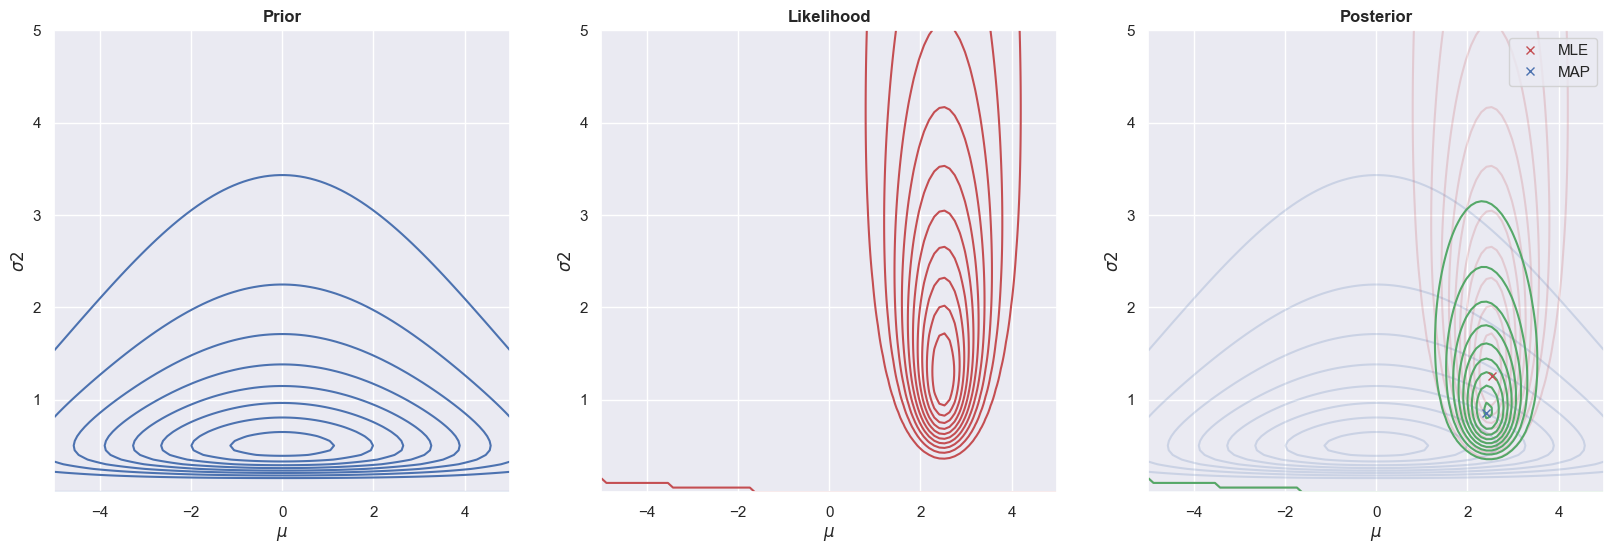

In [4]:
class Grid2D(object):
    """ helper class for evaluating the function func on the grid defined by (alpha, beta)"""

    def __init__(self, mus, sigma2s, func, name="Grid2D"):
        self.mus = mus
        self.sigma2s = sigma2s
        self.grid_size = (len(self.mus), len(self.sigma2s))
        self.mu_grid, self.sigma2_grid = np.meshgrid(mus, sigma2s, indexing='ij')
        self.func = func
        self.name = name
        
        # evaluate function on each grid point
        self.values = self.func(self.mu_grid[:, :, None], self.sigma2_grid[:, :, None]).squeeze()

    def plot_contours(self, ax, color='b', num_contours=10, f=lambda x: x, alpha=1.0, title=None):
        ax.contour(self.mus, self.sigma2s, f(self.values).T, num_contours, colors=color, alpha=alpha)
        ax.set(xlabel='$\\mu$', ylabel='$\\sigma2$')
        ax.set_title(self.name, fontweight='bold')

    @property
    def argmax(self):
        idx = np.argmax(self.values)
        mu_idx, sigam2_idx = np.unravel_index(idx, self.grid_size)
        return self.mus[mu_idx], self.sigma2s[sigam2_idx]


# define grid points
num_mu, num_sigma2 = 90, 100
mus = np.linspace(-5, 5, num_mu)
sigma2s = np.linspace(10e-6, 5, num_sigma2)
y = np.array([1, 2, 3, 4])


# evalute log prior, log likelihood and log joint on the (mu, sigma2)-grid
model = TwoParamModel(y)


log_prior_grid = Grid2D(mus, sigma2s, model.log_prior, 'Prior')
log_lik_grid = Grid2D(mus, sigma2s, model.log_likelihood, 'Likelihood')
log_joint_grid = Grid2D(mus, sigma2s, model.log_joint, 'Posterior') # log joint is proportional to log-posterior

# visualize
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
log_prior_grid.plot_contours(ax[2], f=np.exp, color='b', alpha=0.2)
log_lik_grid.plot_contours(ax[2], f=np.exp, color='r', alpha=0.2)

for idx_plot, grid in enumerate([log_prior_grid, log_lik_grid, log_joint_grid]):
    grid.plot_contours(ax[idx_plot], f=np.exp, color=colors[idx_plot])

# compute and plot MLE and MAP estimators
mu_MLE, sigma2_MLE = log_lik_grid.argmax
mu_MAP, sigma2_MAP = log_joint_grid.argmax

ax[2].plot(mu_MLE, sigma2_MLE, 'rx', label='MLE')
ax[2].plot(mu_MAP, sigma2_MAP, 'bx', label='MAP')
ax[2].legend();
    


**Task 4.2:**

The following code uses grid approximation to compute and plot the approximate marginal posterior distribution $p(\mu|y)$ and $p(\sigma^2|y)$ for $\mu \in [-5, 5]$ and $\sigma^2 \in [0.5, 5]$. The plots are shown in the python cell below.

(90,)
(100,)


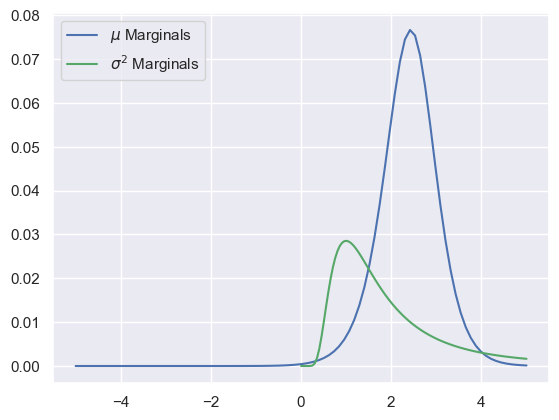

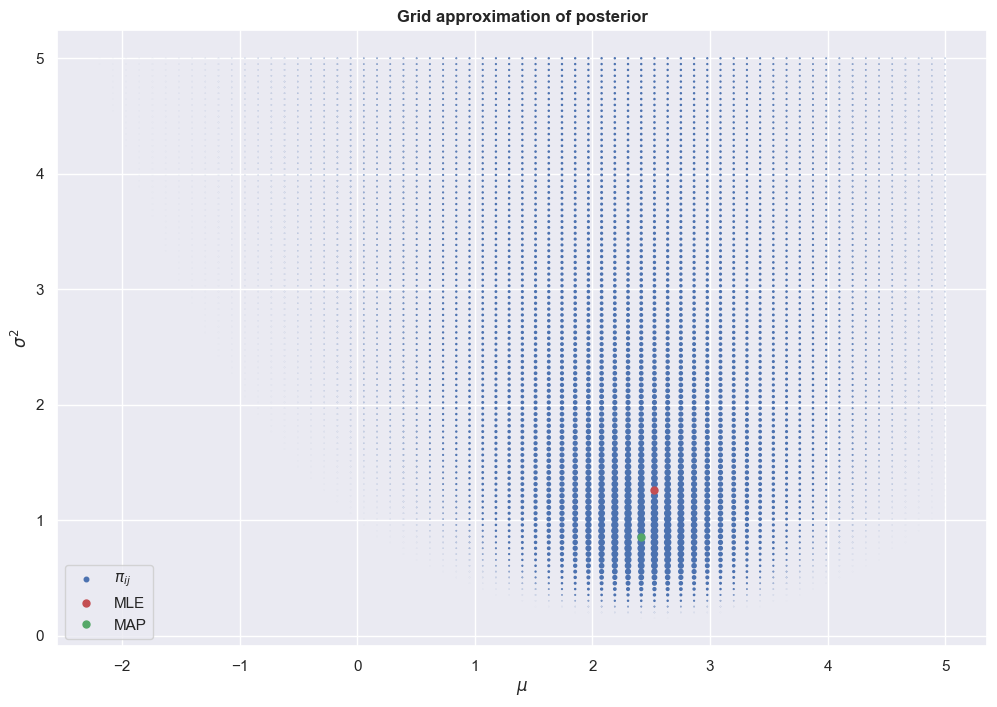

In [6]:
class GridApproximation2D(Grid2D):

    def __init__(self, mus, sigma2s, log_joint, threshold=1e-8, name="GridApproximation2D"):
        Grid2D.__init__(self, mus, sigma2s, log_joint, name)
        self.threshold = threshold
        self.prep_approximation()
        self.compute_marginals()
        self.sanity_check()
        
    def prep_approximation(self):
        
        # [num_mu, num_sigma2]-sized matrix of the log joint evaluated on the grid 
        self.log_joint_grid = self.values
        self.log_joint_grid = self.log_joint_grid - np.max(self.log_joint_grid)



        # [num_mu, num_sigma2]-matrix of \pi_{ij}-values summing to 1.
        Z = np.sum(np.exp(self.log_joint_grid))
        self.probabilities_grid = (1/Z) * np.exp(self.log_joint_grid)

        # flatten for later convinience
        self.mus_flat = self.mu_grid.flatten()                                             # shape: [num_mu*num_sigma2] = [num_outcomes]
        self.sigma2s_flat = self.sigma2_grid.flatten()                                               # shape: [num_mu*num_sigma2] = [num_outcomes]
        self.num_outcomes = len(self.mus_flat)                                                # shape: scalar 
        self.probabilities_flat = self.probabilities_grid.flatten()                              # [num_outcomes]

    def compute_marginals(self):
        self.pi_mu = np.sum(self.probabilities_grid, axis=1)
        
        self.pi_sigma2 = np.sum(self.probabilities_grid, axis=0)
        print(self.pi_mu.shape)
        print(self.pi_sigma2.shape)

        plt.plot(self.mus, self.pi_mu, label="$\\mu$ Marginals", color="b")
        plt.plot(self.sigma2s, self.pi_sigma2, label="$\\sigma^2$ Marginals", color="g")
        plt.legend()

        # compute marginal distribution using sum rule
    def compute_expectation(self, f):
        """ computes expectation of f(mu, sigma2) wrt. the grid approximation """
        return np.sum(f(self.mus_flat, self.sigma2s_flat)*self.probabilities_flat, axis=0)
    
    def sample(self, num_samples=1):
        """ generate num_samples from the grid approximation distribution """
        idx = np.random.choice(np.arange(self.num_outcomes), p=self.probabilities_flat, size=num_samples)
        return self.mus_flat[idx], self.sigma2s_flat[idx]

    def visualize(self, ax, scaling=8000, title='Grid approximation'):
        idx = self.probabilities_flat > self.threshold
        ax.scatter(self.mus_flat[idx], self.sigma2s_flat[idx], scaling*self.probabilities_flat[idx],label='$\pi_{ij}$')        
        ax.set(xlabel='$\\mu$', ylabel='$\\sigma^2$')
        ax.set_title(title, fontweight='bold')

    def sanity_check(self):
        assert self.probabilities_grid.shape == self.grid_size, "Probability grid does not have shape [num_mus, num_sigma2s] (self.grid_size). Check your implementation."
        assert np.all(self.probabilities_grid >= 0), "Not all values in probability grid are non-negative. Check your implementation."
        assert np.allclose(self.probabilities_grid.sum(), 1), "Values in probability grid do not sum to one. Check your implementation."


# define grid points
num_mu, num_sigma2 = 90, 100
mus = np.linspace(-5, 5, num_mu)
sigma2s = np.linspace(10e-6, 5, num_sigma2)
y = np.array([1, 2, 3, 4])

# model
model = TwoParamModel(y)

# construct grid approximation for posterior
post_approx = GridApproximation2D(mus, sigma2s, model.log_joint, name='Posterior')

# plot
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
post_approx.visualize(ax, title='Grid approximation of posterior')
ax.plot(mu_MLE, sigma2_MLE, 'r.', label='MLE', markersize=10);
ax.plot(mu_MAP, sigma2_MAP, 'g.', label='MAP', markersize=10);
ax.legend();

**Task 4.3:**

The following code computes the approximate posterior mean and variance for $\mu$ and $\sigma^2$ using grid approximation. Aswell as the 95% central interval for $\mu$ and $\sigma^2$. The results are shown in the python cell below.

In [7]:


class DiscreteDistribution1D(object):

    def __init__(self, outcomes, probabilities, name='DiscreteDistribution'):
        """ represents discrete random variable X in terms of outcomes and probabilities """
        self.outcomes = outcomes
        self.probabilities = probabilities
        assert self.outcomes.shape == self.probabilities.shape
        self.name = name

    def CDF(self, x):
        """ P[X <= x] """
        idx = self.outcomes <= x
        return np.sum(self.probabilities[idx]) 
    
    def quantile(self, p):
        """ Q(p) = inf {x | p < CDF(x)} """
        cdf_values = np.cumsum(self.probabilities) 
        idx = np.where(np.logical_or(p < cdf_values, np.isclose(p, cdf_values)))[0]
        return np.min(self.outcomes[idx])
    
    @property
    def mean(self):
        """ return scalar corresponding to the mean of the discrete distribution """
        return np.sum(self.outcomes * self.probabilities)  
    
    @property
    def variance(self):
        """ return scalar corresponding to the variance of the discrete distribution """
        return np.sum((self.outcomes - self.mean)**2 * self.probabilities)  
    
    def central_interval(self, interval_size=95):
        """ return tuple (lower, upper) corresponding to the central interval of the discrete distribution """
        c = 1.-interval_size/100.
        return self.quantile(c/2), self.quantile(1-c/2)  
    
    def print_summary(self):
        print(f'Summary for {self.name}')
        print(f'\tMean:\t\t\t\t{self.mean:3.2f}')
        print(f'\tStd. dev.:\t\t\t{np.sqrt(self.variance):3.2f}')
        print(f'\t95%-credibility interval:\t[{self.central_interval()[0]:3.2f}, {self.central_interval()[1]:3.2f}]\n')


# summarize posterior marginals for mu and sigma2
post_mu_marginal = DiscreteDistribution1D(post_approx.mus, post_approx.pi_mu, "posterior distribution of mu")
post_sigma2_marginal = DiscreteDistribution1D(post_approx.sigma2s, post_approx.pi_sigma2, "posterior distribution of sigma2")

post_mu_marginal.print_summary()
post_sigma2_marginal.print_summary()


Summary for posterior distribution of mu
	Mean:				2.39
	Std. dev.:			0.65
	95%-credibility interval:	[1.07, 3.65]

Summary for posterior distribution of sigma2
	Mean:				1.78
	Std. dev.:			1.01
	95%-credibility interval:	[0.56, 4.39]



**Task 4.4:**

The following code computes and plots the posterior predictive density for a new observation $y^*$ using: 1) the plugin approximation with MLE. 2) The plugin approximation with the MAP estimate. 3) The grid approximation. The plots are shown in the python cell below.


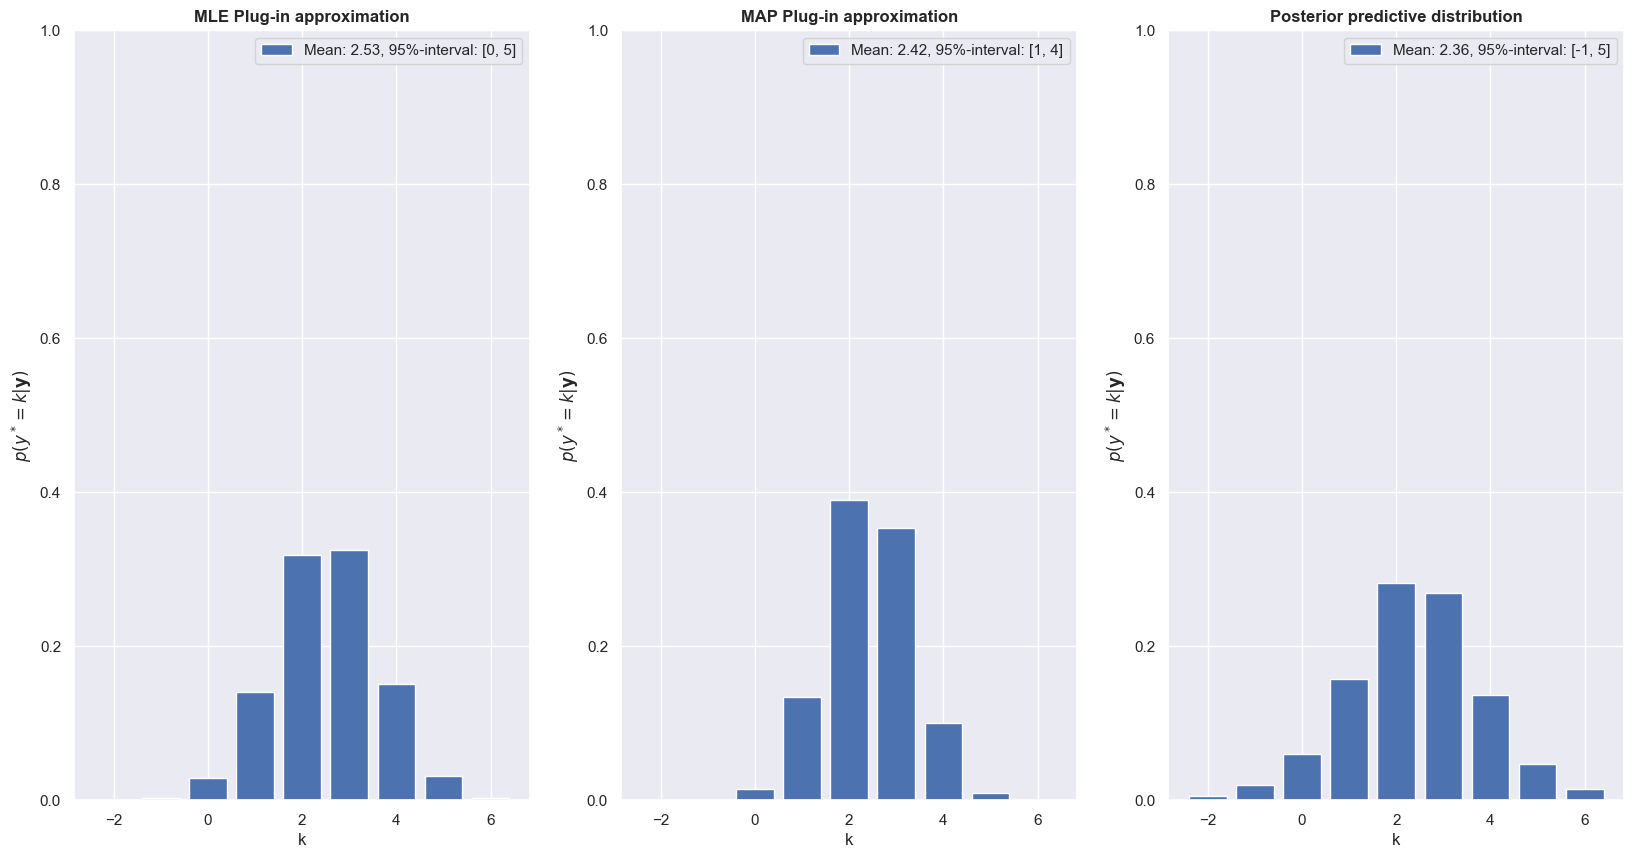

In [8]:

# outcome space for y^*
ks = np.arange(-2, 6+1)

# predictive likelihood p(y^*=k|mu, sigma2) for a given k, mu and sigma2 #Normal distribution
pred_lik = lambda k, mu, sigma2: norm.pdf(k, loc=mu, scale=np.sqrt(sigma2))

# prep figure
fig, ax = plt.subplots(1, 3, figsize=(20, 10))

mean_and_interval_label = lambda dist: f'Mean: {dist.mean:3.2f}, 95%-interval: [{dist.central_interval()[0]:d}, {dist.central_interval()[1]:d}]'

# compute plugin approximations using MLE and MAP. Shape must be [7] (matching the shape of ks)
pred_lik_probs_MLE = pred_lik(ks, mu_MLE, sigma2_MLE)
pred_lik_probs_MAP = pred_lik(ks, mu_MAP, sigma2_MAP)

# compute posterior predictive distribution as a weighted averaged over all parameter vales. Shape must be [7] (matching the shape of ks)
pred_lik_bayes_probs = np.sum(pred_lik(ks, post_approx.mus_flat[:, None], post_approx.sigma2s_flat[:, None])*post_approx.probabilities_flat[:, None], axis=0) 

# prepare for plotting etc
pred_dist_MLE = DiscreteDistribution1D(ks, pred_lik_probs_MLE, name='MLE Plug-in approximation')
pred_dist_MAP = DiscreteDistribution1D(ks, pred_lik_probs_MAP, name='MAP Plug-in approximation')
pred_dist_bayes = DiscreteDistribution1D(ks, pred_lik_bayes_probs, name="Posterior predictive distribution")

# plot
for i, dist in enumerate([pred_dist_MLE, pred_dist_MAP, pred_dist_bayes]):
    ax[i].bar(ks, dist.probabilities, label=mean_and_interval_label(dist))
    ax[i].set(xlabel='k', ylabel='$p(y^* = k|\\mathbf{y})$', ylim =(0, 1))
    ax[i].set_ylim((0, 1))
    ax[i].set_title(f'{dist.name}', fontweight='bold')
    ax[i].set(xlabel='k', ylabel='$p(y^* = k|\\mathbf{y})$', ylim =(0, 1))
    ax[i].legend()
